In [1]:
import traja
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import gaussian_filter
from scipy import stats
df = pd.read_csv('sost_Trace.csv')
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [2]:
df

,time,x,y
0,1.001,-3.409,-2.178
1,1.134,-3.409,-2.178
2,1.268,-3.409,-2.178
3,1.401,-3.693,-1.231
4,1.535,-3.599,-0.758
...,...,...,...
7600,1874.740,44.510,2.368
7601,1874.873,44.510,5.493
7603,1875.140,44.321,9.944
7604,1875.273,44.321,9.754


In [43]:
def minmax(occ):
    kk = (occ - np.amin(occ)) / (np.amax(occ) - np.amin(occ))
    kl = pd.DataFrame(kk)
    #sns.heatmap(kl, square=True, xticklabels=False, yticklabels=False)
    return kl

In [44]:
def curlMap(df, n):
    #делаем индексы с 0 без пропусков
    ind = range(0, len(df))
    df = df.reindex(ind)
    vx = []
    vy = []
    curl = []
    for i in range(len(df)):
        if i == 0:
            vx.append(0)
            vy.append(0)
            curl.append(0)
        elif (df['x'][i]-df['x'][i-1])==0 or (df['y'][i]-df['y'][i-1])==0:
            dx = df['x'][i]-df['x'][i-1]
            dy = df['y'][i]-df['y'][i-1]
            dt = df['time'][i]-df['time'][i-1]
            vvx = dx/dt
            vvy = dy/dt
            vx.append(vvx)
            vy.append(vvy)
            curl.append(0)
        else:
            dx = df['x'][i]-df['x'][i-1]
            dy = df['y'][i]-df['y'][i-1]
            dt = df['time'][i]-df['time'][i-1]
            vvx = dx/dt
            vvy = dy/dt
            vx.append(vvx)
            vy.append(vvy)
            curl.append(vvy/dx - vvx/dy)
    
    df.insert(3, "Vx", vx)
    df.insert(4, "Vy", vy)
    df.insert(5, "curl", curl)
    binx = np.linspace(df["x"].min(), df["x"].max(), n+1)
    x_cut = pd.cut(df.x, binx, right=False)
    biny = np.linspace(df["y"].min(), df["y"].max(), n+1)
    y_cut = pd.cut(df.y, biny, right=False)
    dfn = df.groupby([x_cut, y_cut]).mean()
    dfn = pd.DataFrame(dfn.loc[:, 'curl'])
    dfn = dfn.unstack()
    #зашьем в керл минмакс
    dfn = minmax(dfn)
    #заменим nan на 0
    dfn = dfn.fillna(0)
    sns.heatmap(dfn, square=True, xticklabels=False, yticklabels=False)
    return dfn

In [57]:
%matplotlib inline

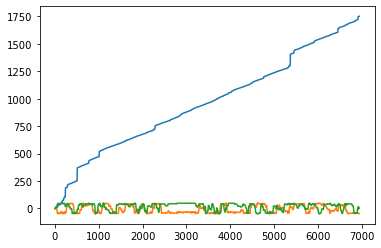

In [59]:
plt.plot(tr3)

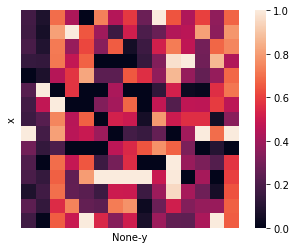

In [45]:
curl3 = curlMap(tr3, 15)

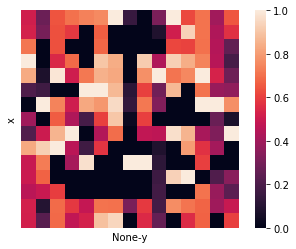

In [46]:
curl4 = curlMap(tr4, 15)

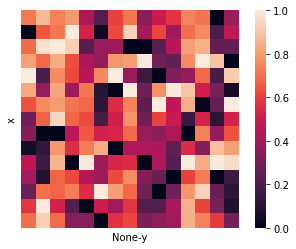

In [48]:
curl5 = curlMap(tr5, 15)

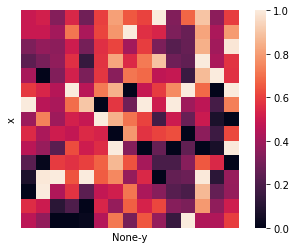

In [49]:
curl6 = curlMap(tr6, 15)

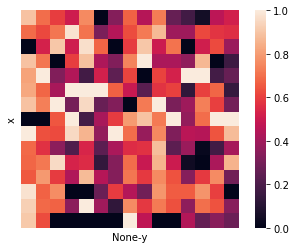

In [50]:
curl7 = curlMap(tr7, 15)

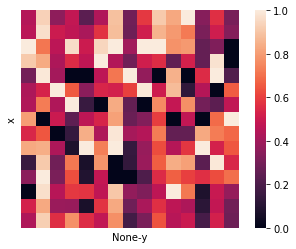

In [51]:
curl9 = curlMap(tr9, 15)

#### Усредняем

In [53]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [55]:
curlMean = np.mean( np.array([ curl3, curl4, curl5, curl6, curl7, curl9]), axis=0 )
sns.heatmap(curlMean, square=True, xticklabels=False, yticklabels=False)

<AxesSubplot:>

In [4]:
def openFile(ff):
    df = pd.read_csv(ff, sep=" ",header = None, names=['numb', 'time', 'x', 'y'])
    df = df.drop('numb', axis=1)
    df = df.drop(df[df.time > 1755].index)
    df.traja.plot()
    return(df)

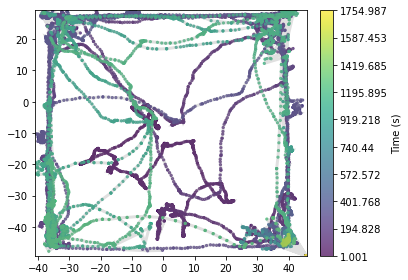

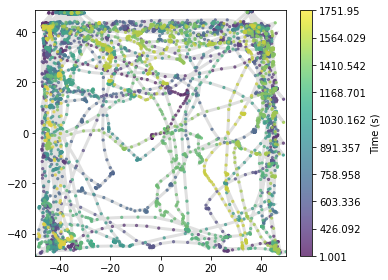

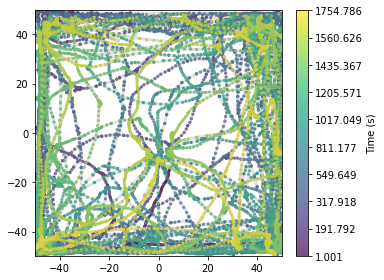

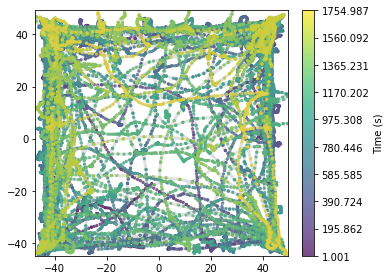

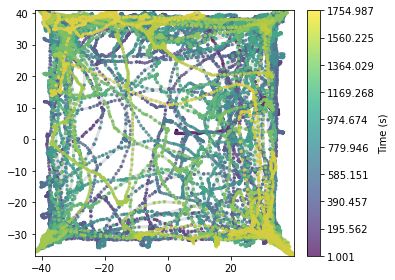

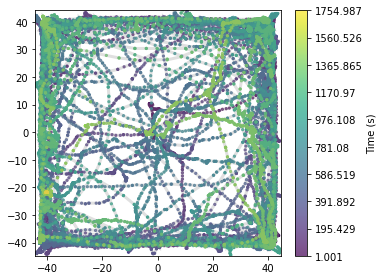

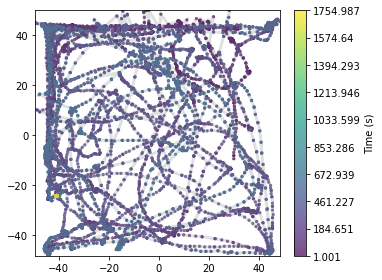

In [6]:
tr4 = openFile('Trace_4.txt')
tr3 = openFile('Trace_3.txt')
tr5 = openFile('Trace_5.txt')
tr6 = openFile('Trace_6.txt')
tr7 = openFile('Trace_7.txt')
tr9 = openFile('Trace_9.1.txt')
tr92 = openFile('Trace_9.2.txt')

In [14]:
def minmax(occ):
    kk = (occ - np.amin(occ)) / (np.amax(occ) - np.amin(occ))
    kl = pd.DataFrame(kk)
    sns.heatmap(kl, square=True, xticklabels=False, yticklabels=False)
    return kl

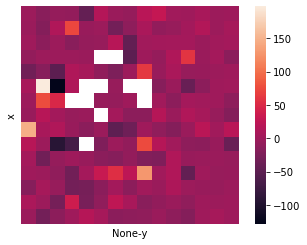

NameError: name 'occ3' is not defined

In [15]:
curl3 = curlMap(tr3, 15)
curl3 = minmax(occ3)

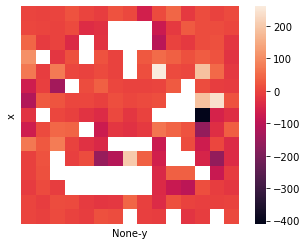

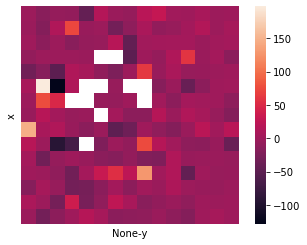

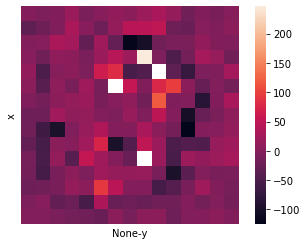

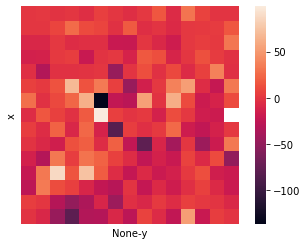

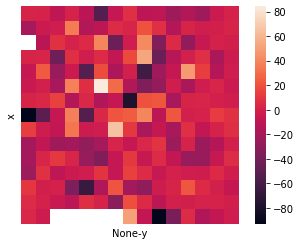

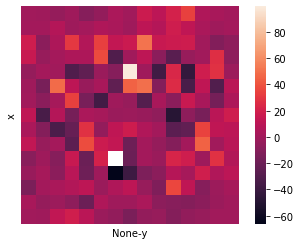

In [10]:
alltr = [tr4, tr3, tr5, tr6, tr7, tr9]
for i in alltr:
    curlMap(i, 15)